In [34]:
import numpy as np
from typing import List
import time
import matplotlib.pyplot as plt

class RNG:
    def __init__(self, seed=None):
        self.modulus = 2**32
        self.multiplier = 1664525
        self.increment = 1013904223

        if seed is None:
            current_time = time.time()

            self.seed = (
                self.multiplier * int(current_time) + self.increment
            ) % self.modulus
        else:
            self.seed = seed % self.modulus

    def uniform(self, count: int) -> np.ndarray:
        # Uses Linear Congruential Generator

        if count <= 0:
            print("Count must be a positive integer")
            return

        numbers = np.array([])

        for _ in range(count):
            self.seed = (self.multiplier * self.seed + self.increment) % self.modulus

            numbers = np.append(numbers, self.seed / self.modulus)

        return numbers

    def gaussian(self, count: int, mean: float = 0, std_dev: float = 1) -> np.ndarray:
        # Uses Box muller Transform
        if count <= 0:
            print("Count must be a positive integer")
            return

        if std_dev < 0:
            print("Standard deviation must be non-negative")
            return

        u1, u2 = self.uniform(count), self.uniform(count)

        factor = np.sqrt(-2 * np.log(u1))

        z0 = factor * np.cos(2 * np.pi * u2)
        z1 = factor * np.sin(2 * np.pi * u2)

        z = np.concatenate([z0, z1])[:count]

        return z * std_dev + mean

    def mv_gaussian(
        self, mean_vec: List[float], cov_matrix: List[List[float]], count: int
    ) -> np.ndarray:
        # Using SVD to compute square roots
        if count <= 0:
            print("Count must be a positive integer")
            return

        mean_vec = np.array(mean_vec)
        cov_matrix = np.array(cov_matrix)

        if not np.all(cov_matrix == cov_matrix.T):
            print("Covariance matrix must be square-symmetric.")
            raise Exception("Covariance matrix must be square-symmetric.")

        if mean_vec.shape[0] != cov_matrix.shape[0]:
            print("Mean vector should have the same rows as the covariance matrix")
            raise Exception("Mean vector should have the same rows as the covariance matrix")

        U, S, Vt = np.linalg.svd(cov_matrix)
        sqrt_cov_matrix = U @ np.diag(np.sqrt(S)) @ Vt
        
        z = np.array([self.gaussian(count) for _ in range(mean_vec.shape[0])])
        z = z.T
        
        return z @ sqrt_cov_matrix.T + mean_vec


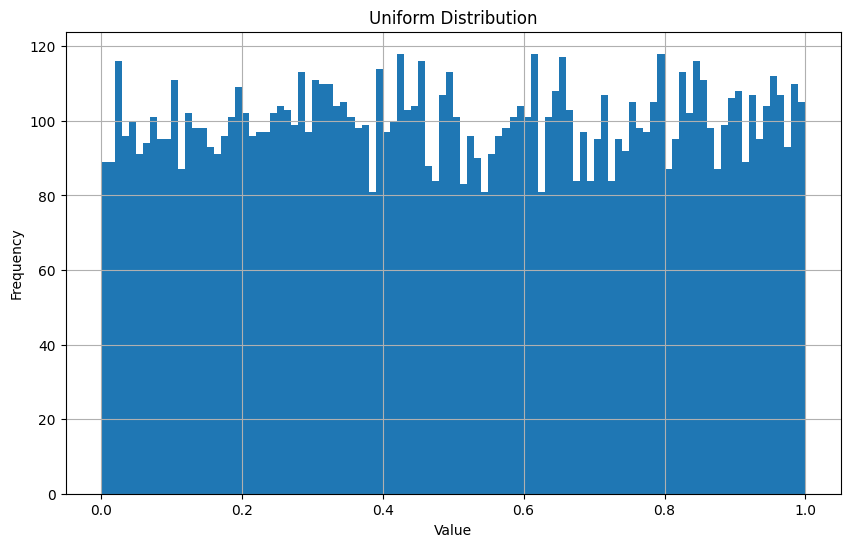

In [35]:
generator = RNG()

uniform_samples = generator.uniform(10000)
    
plt.figure(figsize=(10, 6))
plt.hist(uniform_samples, bins=100)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

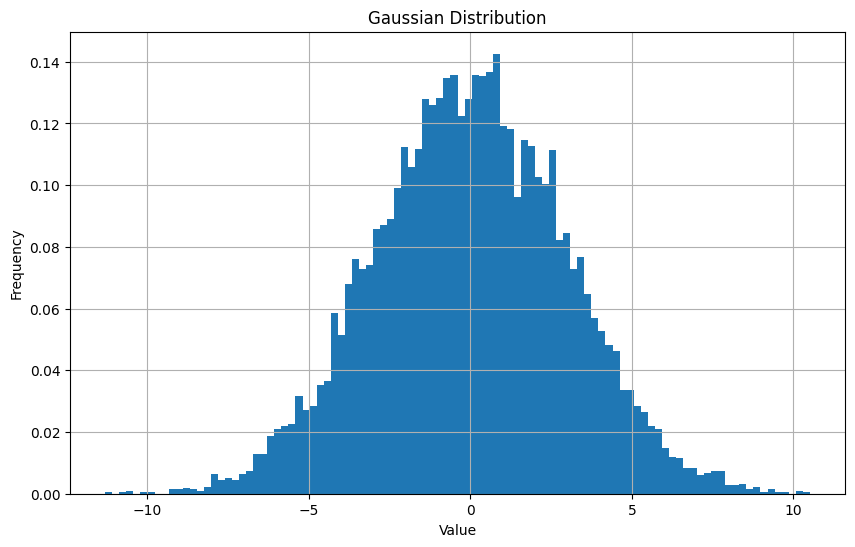

In [42]:
gaussian_samples = generator.gaussian(10000, 0, 3)

plt.figure(figsize=(10, 6))
plt.hist(gaussian_samples, bins=100, density=True)
plt.title("Gaussian Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [41]:
mv_gaussian_samples = generator.mv_gaussian([0, 0], [[1, -3], [3, 0]], 10000)

plt.figure(figsize=(10, 8))
plt.scatter(mv_gaussian_samples[:, 0], mv_gaussian_samples[:, 1])
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Covariance matrix must be square-symmetric.


Exception: Covariance matrix must be square-symmetric.